传输模式及排序

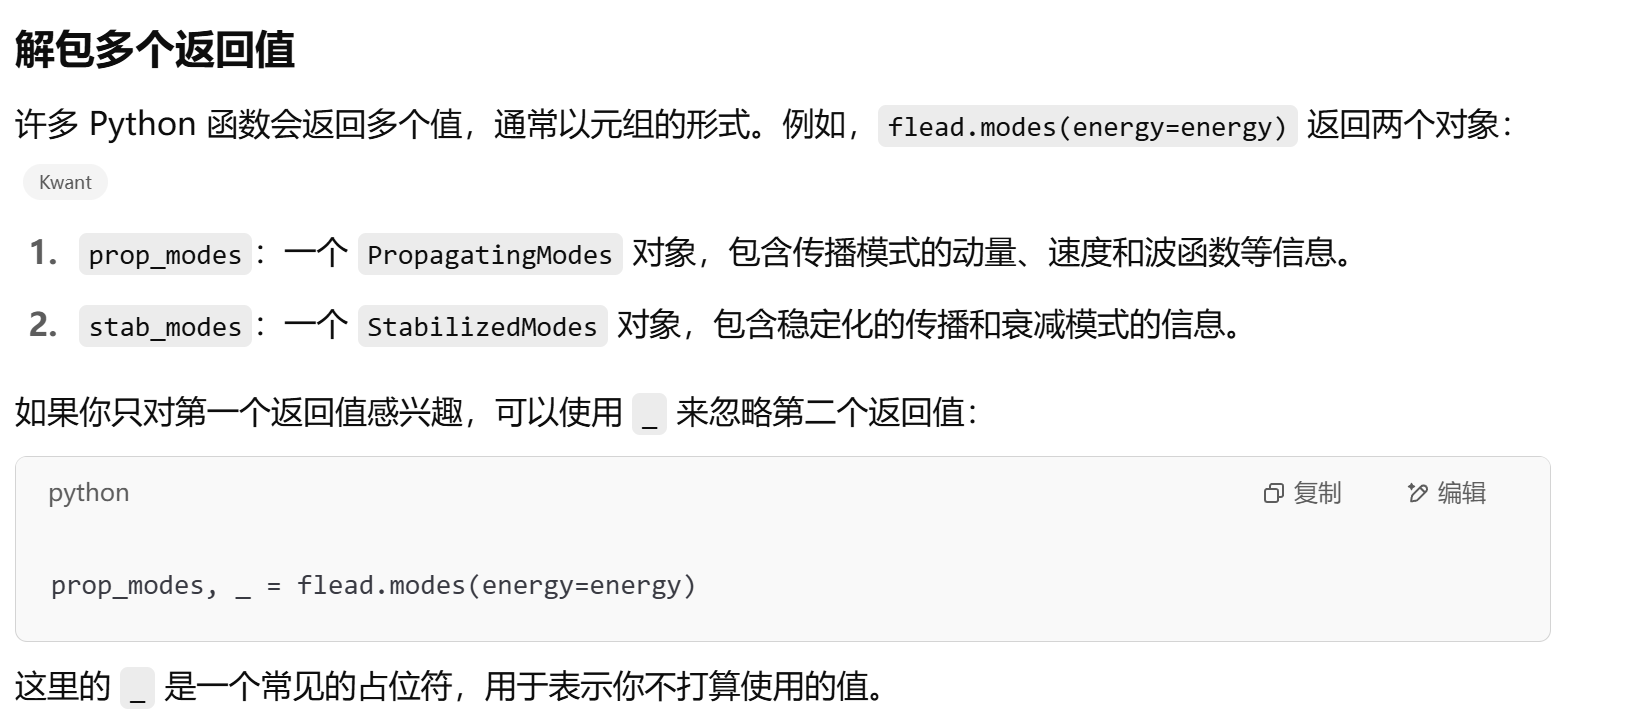

prop_mods含有动量信息

In [6]:
import kwant
import numpy as np
import matplotlib.pyplot as plt

# 定义二维方格晶格，每个格点有两个轨道
lat = kwant.lattice.square(norbs=2)

# 定义导线：具有平移对称性
lead_builder = kwant.Builder(kwant.TranslationalSymmetry((1, 0)))

# 定义导线的宽度
width = 2

# 添加格点和跳跃项
for y in range(width):
    lead_builder[lat(0, y)] = np.zeros((2, 2))  # 现场能量为零
    if y > 0:
        lead_builder[lat(0, y), lat(0, y - 1)] = -np.eye(2)  # y方向的跳跃项

# x方向的跳跃项
for y in range(width):
    lead_builder[lat(1, y), lat(0, y)] = -np.eye(2)

# 将 Builder 对象转化为 Kwant System 对象
flead = lead_builder.finalized()

# 选择一个能量值
energy = 0.5

# 计算传播模式
prop_modes, _ = flead.modes(energy=energy)

# 获取传播模式的数量
num_propagating_modes = len(prop_modes.momenta)
print(f"在能量 E={energy} 时，有 {num_propagating_modes} 个传播模式。")

# 打印每个模式的动量和速度
print("\n传播模式的动量和速度：")
for i in range(num_propagating_modes):
    momentum = prop_modes.momenta[i]
    velocity = prop_modes.velocities[i]
    print(f"模式 {i+1}: 动量 k = {momentum:.4f}, 速度 v = {velocity:.4f}")


在能量 E=0.5 时，有 8 个传播模式。

传播模式的动量和速度：
模式 1: 动量 k = -2.4189, 速度 v = -1.3229
模式 2: 动量 k = -2.4189, 速度 v = -1.3229
模式 3: 动量 k = -1.3181, 速度 v = -1.9365
模式 4: 动量 k = -1.3181, 速度 v = -1.9365
模式 5: 动量 k = 2.4189, 速度 v = 1.3229
模式 6: 动量 k = 2.4189, 速度 v = 1.3229
模式 7: 动量 k = 1.3181, 速度 v = 1.9365
模式 8: 动量 k = 1.3181, 速度 v = 1.9365


输出结果中动量和速度值的重复是由系统的对称性和能带结构的简并性引起的。在这个由方格晶格构成的导线系统中，每个格点有两个轨道，且导线宽度为 2，导致在能量 E=0.5 时，8 个传播模式中某些模式具有相同的动量和速度。

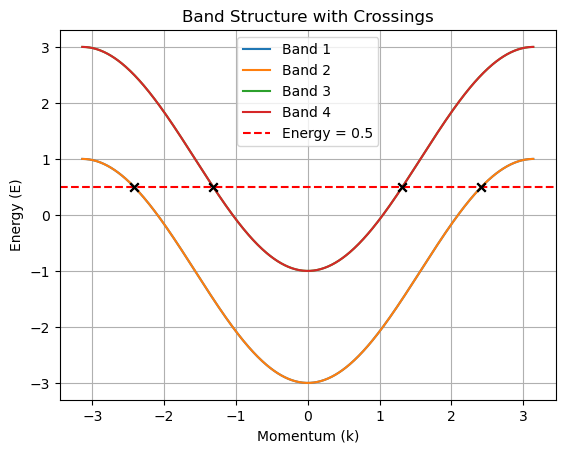

In [4]:
bands = kwant.physics.Bands(flead)
momenta = np.linspace(-np.pi, np.pi, 500)
energies = np.array([bands(k) for k in momenta])
target_energy = 0.5

plt.figure()
for band_index in range(energies.shape[1]):
    plt.plot(momenta, energies[:, band_index], label=f'Band {band_index+1}')
    # 查找交点
    for i in range(len(momenta) - 1):
        E1, E2 = energies[i, band_index], energies[i+1, band_index]
        if (E1 - target_energy) * (E2 - target_energy) < 0:  # 有交点
            k1, k2 = momenta[i], momenta[i+1]
            # 线性插值求交点位置
            k_cross = k1 + (target_energy - E1) * (k2 - k1) / (E2 - E1)
            plt.scatter(k_cross, target_energy, color='black', marker='x', zorder=5)

plt.axhline(target_energy, color='red', linestyle='--', label=f'Energy = {target_energy}')
plt.xlabel('Momentum (k)')
plt.ylabel('Energy (E)')
plt.title('Band Structure with Crossings')
plt.legend()
plt.grid(True)
plt.show()
